<a href="https://colab.research.google.com/github/fredrick1993/bioinformatics-and-computational-/blob/main/fred_classwork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

contro_df = pd.read_csv('/content/classwork2.csv')
print(contro_df)




        time     host
0   0.000000  1630000
1   0.208333  1710000
2   0.333333  1750000
3   0.500000  1770000
4   0.666667  1960000
5   0.833333  1480000
6   1.020833  2150000
7   1.166667  1900000
8   1.333333  2000000
9   1.541667  2670000
10  1.708333  2900000
11  1.875000  2450000
12  2.125000  2500000
13  2.625000  3660000


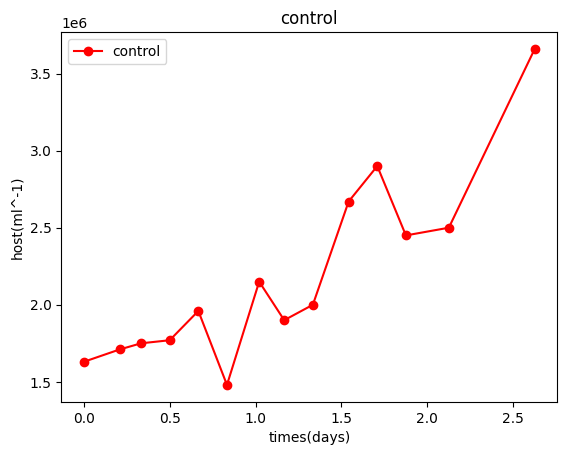

In [15]:
x = contro_df['time']
y = contro_df['host']
plt.xlabel('times(days)')
plt.ylabel('host(ml^-1)')
plt.plot(x,y, color='r', marker='o', label='control')
plt.legend()
plt.title('control')
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

treat_df = pd.read_csv('/content/phaeocystis_PgV_one_step.csv')
print(treat_df)


        time     host      virus
0   0.000000  1420000   25000000
1   0.208333  1500000   27300000
2   0.333333  1600000   26100000
3   0.500000  1550000   22600000
4   0.666667  1780000   25500000
5   0.833333  1650000   40900000
6   1.020833  1730000   47900000
7   1.166667  1680000   73600000
8   1.333333  1710000  132000000
9   1.541667  1350000  297000000
10  1.708333   995000  582000000
11  1.875000   660000  688000000
12  2.125000   296000  582000000
13  2.625000   430000  556000000


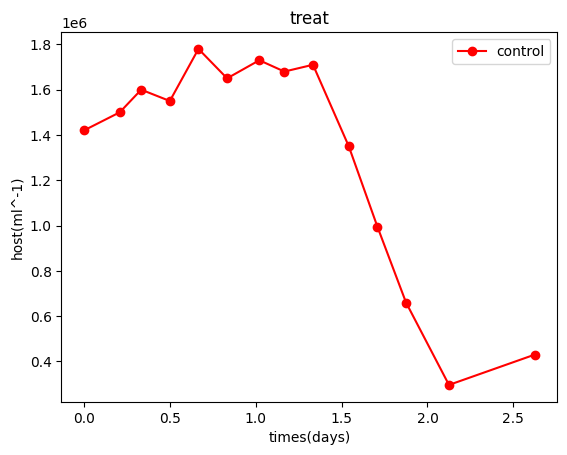

In [14]:
x = treat_df['time']
y = treat_df['host']
plt.xlabel('times(days)')
plt.ylabel('host(ml^-1)')
plt.plot(x,y, color='r', marker='o', label='control')
plt.legend()
plt.title('treat')
plt.show()

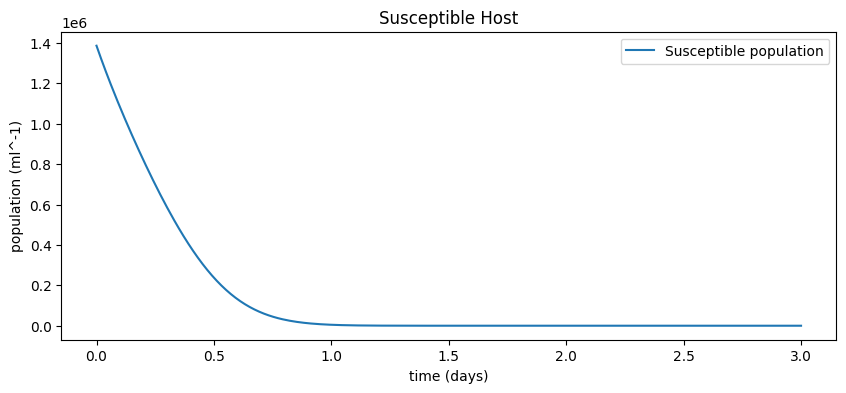

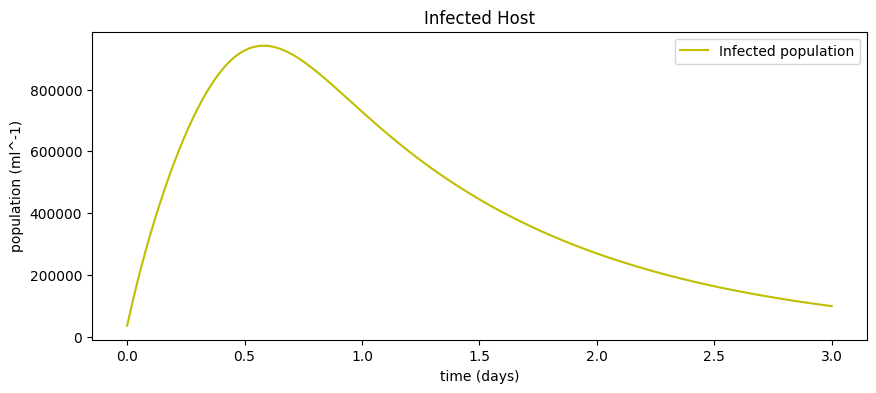

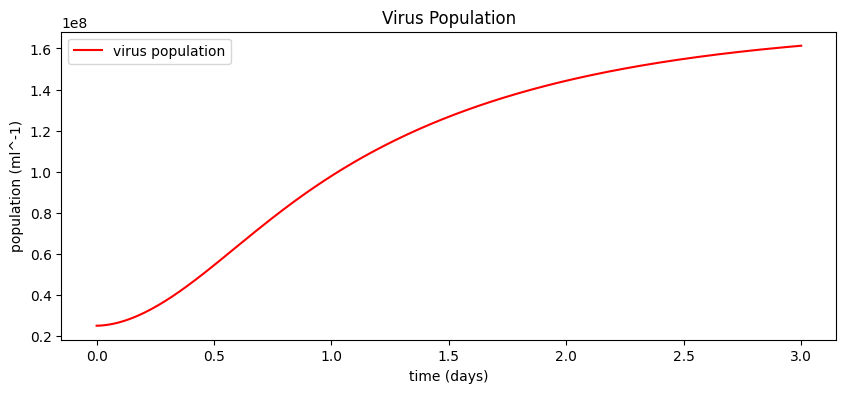

In [16]:
#using Euler integration to predict the dynamics of S, I, an V.
import numpy as np
import matplotlib.pyplot as plt

#intial parameters
S = 1420000
I = 0
V = 25000000
mu = 0.1
phi = 1e-7
beta = 100
lamb= 1.0

#time domain
tmin = 0
tmax = 3
delta = 0.01
nstep = (tmax-tmin)/delta
times = np.linspace(tmin, tmax, int(nstep))

# arrays to store solutions in
Ss,Is,Vs = np.r_[[]],np.r_[[]],np.r_[[]]

# now do Euler integration
for t in times:
    dSdt = mu*S - phi*S*V
    dIdt = phi*S*V - lamb*I
    dVdt = beta*I
    S = S + delta*dSdt
    I = I + delta*dIdt
    V = V + delta*dVdt
    Ss = np.append(Ss,S)
    Is = np.append(Is,I)
    Vs = np.append(Vs,V)

# displaying figures
plt.figure(figsize=(10,4))
plt.plot(times, Ss, label='Susceptible population')
plt.ylabel('population (ml^-1)')
plt.xlabel('time (days)')
plt.legend()
plt.title('Susceptible Host')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(times, Is, color='y', label='Infected population')
plt.ylabel('population (ml^-1)')
plt.xlabel('time (days)')
plt.legend()
plt.title('Infected Host')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(times, Vs, color='r', label='virus population')
plt.ylabel('population (ml^-1)')
plt.xlabel('time (days)')
plt.legend()
plt.title('Virus Population')
plt.show()

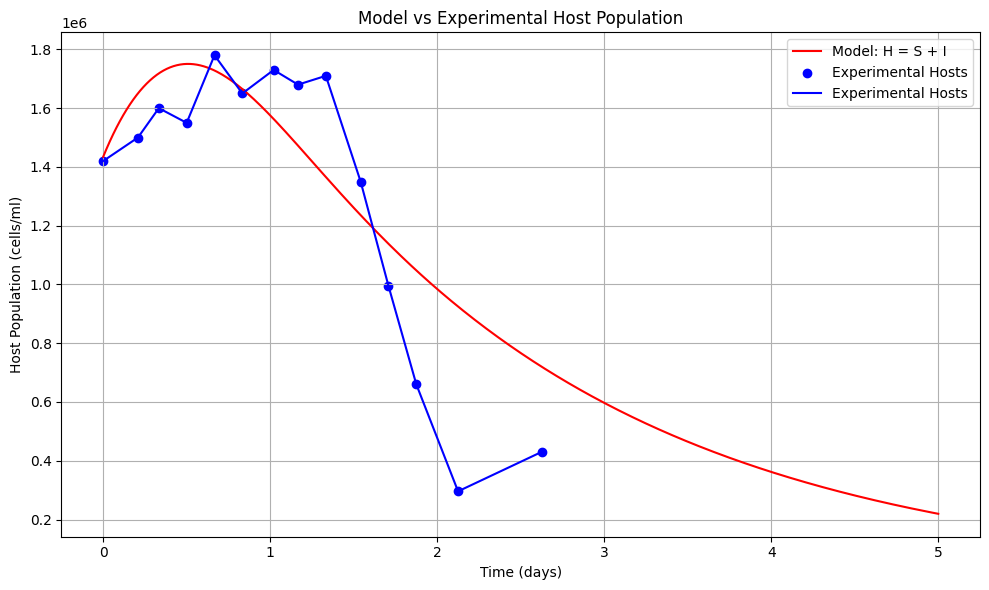

In [17]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load experimental data from classwork2.csv
exp_df = pd.read_csv("/content/phaeocystis_PgV_one_step.csv")  # update path if needed

# Initial values from first row of experimental data
S0 = 1420000      # initial susceptible hosts
I0 = 0                     # no infected hosts initially
V0 = 2.5e7                 # initial virus population (assumed)

# Time setup
tmin, tmax, delta = 0, 5, 0.01
nsteps = int((tmax - tmin) / delta)
times = np.linspace(tmin, tmax, nsteps)

# Parameters (adjust these to improve fit)
mu = 1.0         # host growth rate
phi = 1e-7       # infection rate
lambda_ = 0.5    # infected host death rate (lysis)
beta = 50        # burst size

# Initialize values
S = S0
I = I0
V = V0

# Arrays to store results
Ss = np.r_[[]]
Is = np.r_[[]]
Vs = np.r_[[]]

# Simulation loop using for t in times
for t in times:
    dS = mu * S - phi * S * V
    dI = phi * S * V - lambda_ * I
    dV = beta * lambda_ * I - phi * S * V

    # Euler updates
    S = S + dS * delta
    I = I + dI * delta
    V = V + dV * delta

    # Save results
    Ss = np.append(Ss, S)
    Is = np.append(Is, I)
    Vs = np.append(Vs, V)

# Total hosts (S + I)
Hs = Ss + Is

# Plot model vs experimental host data
plt.figure(figsize=(10, 6))
plt.plot(times, Hs, label='Model: H = S + I', color='red')  # model prediction
plt.scatter(exp_df['time'], exp_df['host'], label='Experimental Hosts', color='blue')  # actual data
plt.plot(exp_df['time'], exp_df['host'], label='Experimental Hosts', color='blue')  # actual data
plt.xlabel('Time (days)')
plt.ylabel('Host Population (cells/ml)')
plt.title('Model vs Experimental Host Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


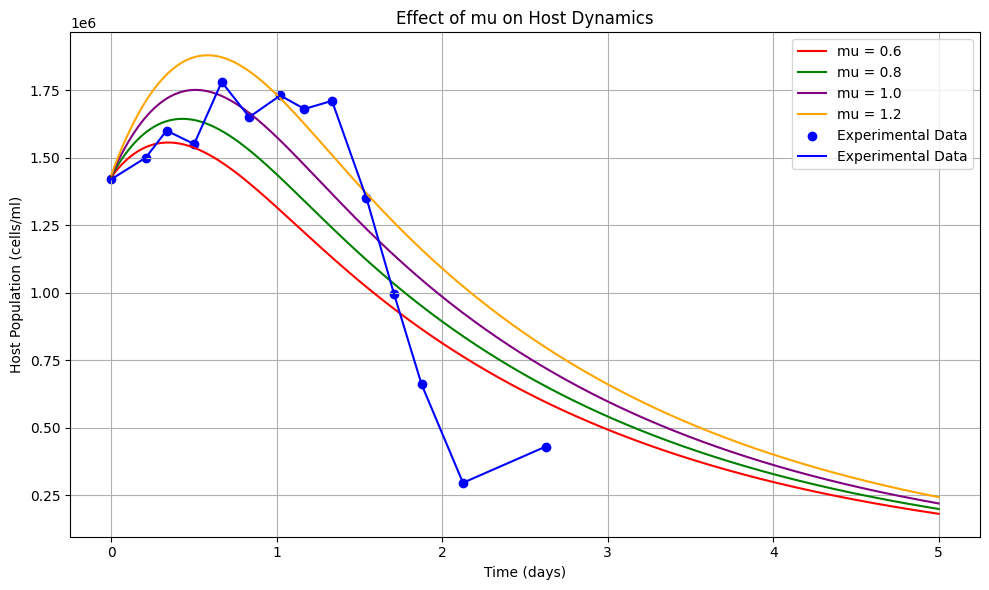

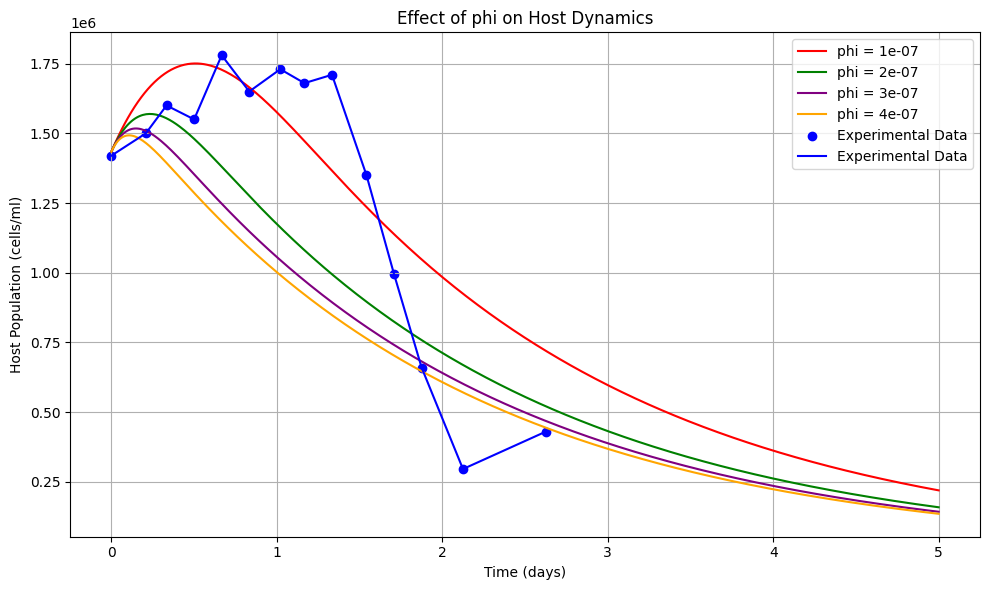

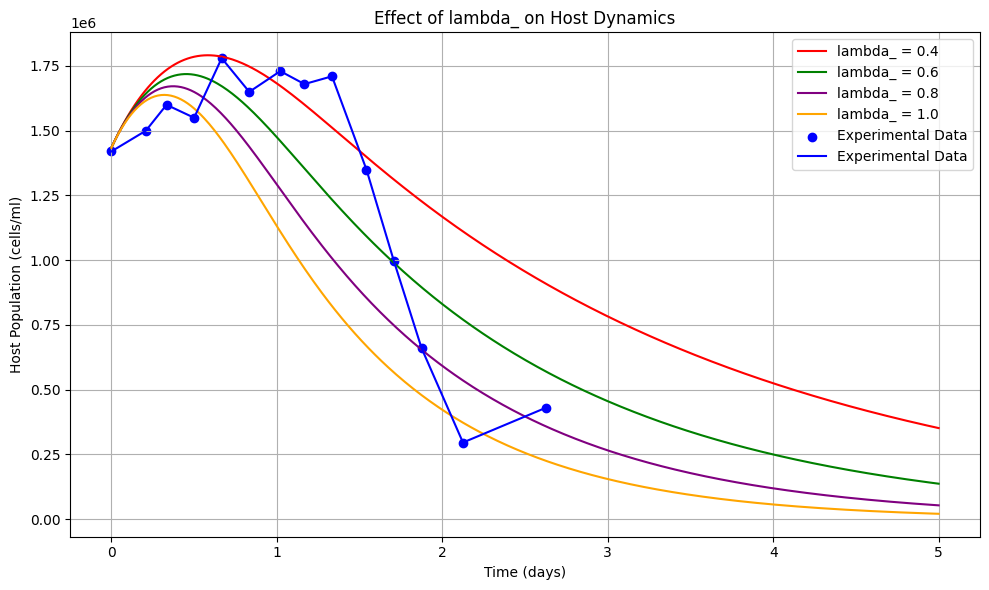

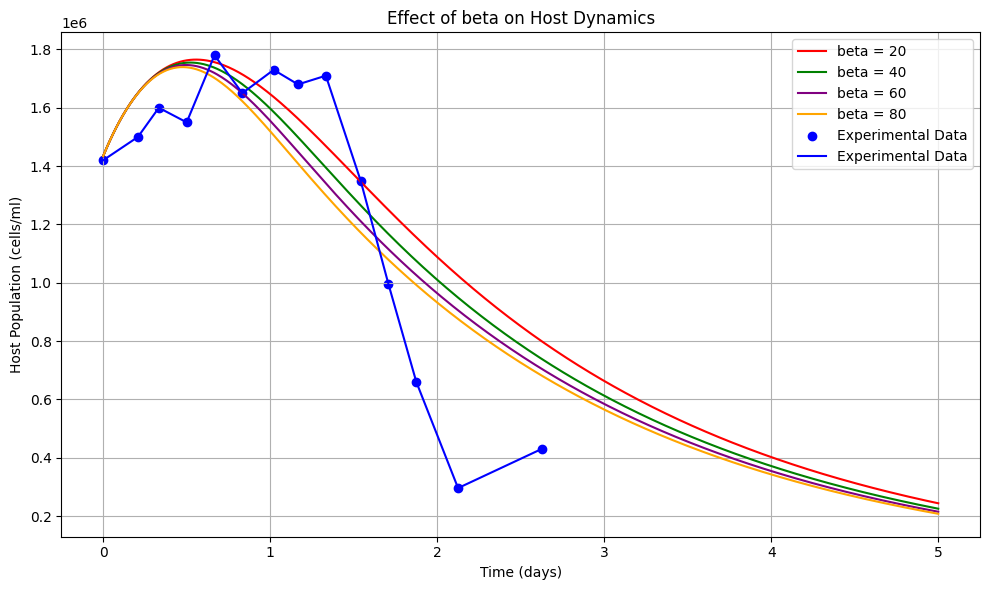

In [19]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load experimental data
exp_df = pd.read_csv("/content/phaeocystis_PgV_one_step.csv")  # ← change path if needed

# SIV model function
def run_model(mu, phi, lambda_, beta, S0, I0, V0, times, delta):
    S, I, V = S0, I0, V0
    Ss, Is, Vs = np.r_[[]], np.r_[[]], np.r_[[]]
    for t in times:
        dS = mu * S - phi * S * V
        dI = phi * S * V - lambda_ * I
        dV = beta * lambda_ * I - phi * S * V
        S += dS * delta
        I += dI * delta
        V += dV * delta
        Ss = np.append(Ss, S)
        Is = np.append(Is, I)
        Vs = np.append(Vs, V)
    return Ss, Is, Vs, Ss + Is  # return total host H = S + I

# Time settings
tmin, tmax, delta = 0, 5, 0.01
times = np.linspace(tmin, tmax, int((tmax - tmin) / delta))

# Initial conditions from data
S0 = exp_df['host'][0]
I0 = 0
V0 = 2.5e7  # assumed virus level

# Base parameters
base_params = {'mu': 1.0, 'phi': 1e-7, 'lambda_': 0.5, 'beta': 50}

# Parameter values to test (one at a time)
test_sets = {
    'mu': [0.6, 0.8, 1.0, 1.2],
    'phi': [1e-7, 2e-7, 3e-7, 4e-7],
    'lambda_': [0.4, 0.6, 0.8, 1.0],
    'beta': [20, 40, 60, 80]
}

# Loop through each parameter type
for param_name, values in test_sets.items():
    plt.figure(figsize=(10, 6))  # new figure for each parameter
    colors = ['red', 'green', 'purple', 'orange']  # line colors

    for i, val in enumerate(values):
        # Keep other parameters constant
        params = base_params.copy()
        params[param_name] = val

        # Run model with this setup
        _, _, _, Hs = run_model(
            params['mu'], params['phi'], params['lambda_'], params['beta'],
            S0, I0, V0, times, delta
        )

        # Plot model result
        plt.plot(times, Hs, label=f"{param_name} = {val}", color=colors[i])

    # Plot experimental data
    plt.scatter(exp_df['time'], exp_df['host'], label='Experimental Data', color='blue')
    plt.plot(exp_df['time'], exp_df['host'], label='Experimental Data', color='blue')

    # Labels and layout
    plt.title(f'Effect of {param_name} on Host Dynamics')
    plt.xlabel('Time (days)')
    plt.ylabel('Host Population (cells/ml)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Best-fit parameters:
mu = 0.6095, phi = 2.98e-08, lambda = 1.2995, beta = 64.73


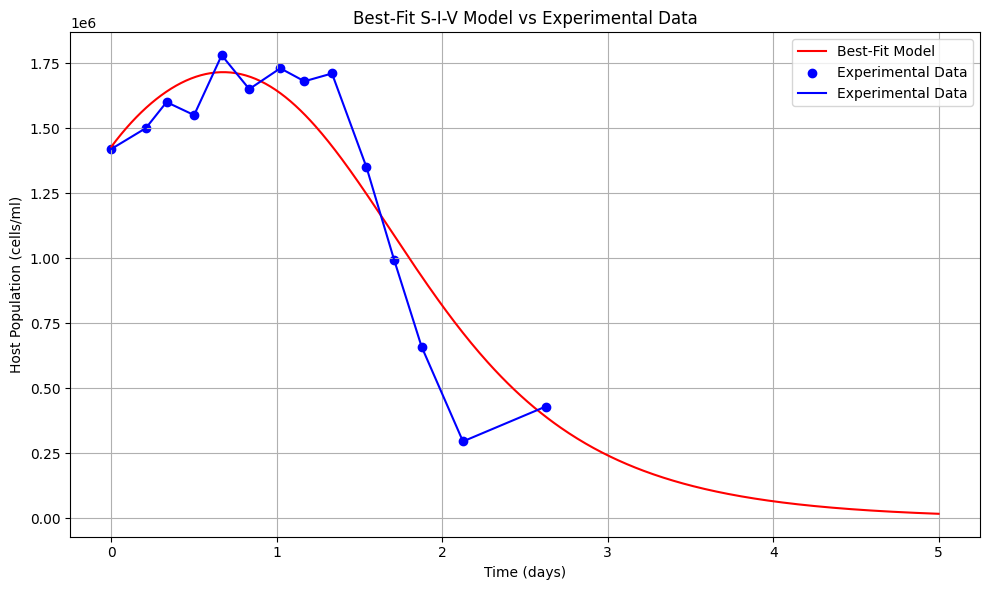

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load treatment data
treat_df = pd.read_csv("//content/phaeocystis_PgV_one_step.csv")

# Initial conditions from data
S0 = treat_df['host'][0]
I0 = 0
V0 = 2.5e7
tmin, tmax, delta = 0, 5, 0.01
times = np.linspace(tmin, tmax, int((tmax - tmin) / delta))

# Function to simulate S-I-V model (Euler, no logistic)
def simulate(params):
    mu, phi, lambda_, beta = params
    S, I, V = S0, I0, V0
    Hs = []
    for t in times:
        dS = mu * S - phi * S * V
        dI = phi * S * V - lambda_ * I
        dV = beta * lambda_ * I - phi * S * V
        S = S + dS * delta
        I = I + dI * delta
        V = V + dV * delta
        Hs.append(S + I)
    return np.array(Hs)

# Error function: compare model to experimental data
def error(params):
    Hs = simulate(params)
    # Interpolate model to experimental time points
    H_model = np.interp(treat_df['time'], times, Hs)
    return np.sum((H_model - treat_df['host'])**2)

# Initial guess for parameters
initial_guess = [0.8, 2e-7, 0.8, 40]

# Optimize to find best parameters
result = minimize(error, initial_guess, bounds=[(0.01, 2), (1e-8, 1e-6), (0.01, 2), (5, 100)])

best_params = result.x
print("Best-fit parameters:")
print(f"mu = {best_params[0]:.4f}, phi = {best_params[1]:.2e}, lambda = {best_params[2]:.4f}, beta = {best_params[3]:.2f}")

# Simulate model with best parameters
Hs_best = simulate(best_params)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(times, Hs_best, label='Best-Fit Model', color='red')
plt.scatter(treat_df['time'], treat_df['host'], label='Experimental Data', color='blue')
plt.plot(treat_df['time'], treat_df['host'], label='Experimental Data', color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Host Population (cells/ml)')
plt.title('Best-Fit S-I-V Model vs Experimental Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Best-fit parameters with logistic + decay:
mu = 1.4752, phi = 3.83e-08, lambda = 1.2529, beta = 48.35, K = 2.50e+06, d = 0.4055


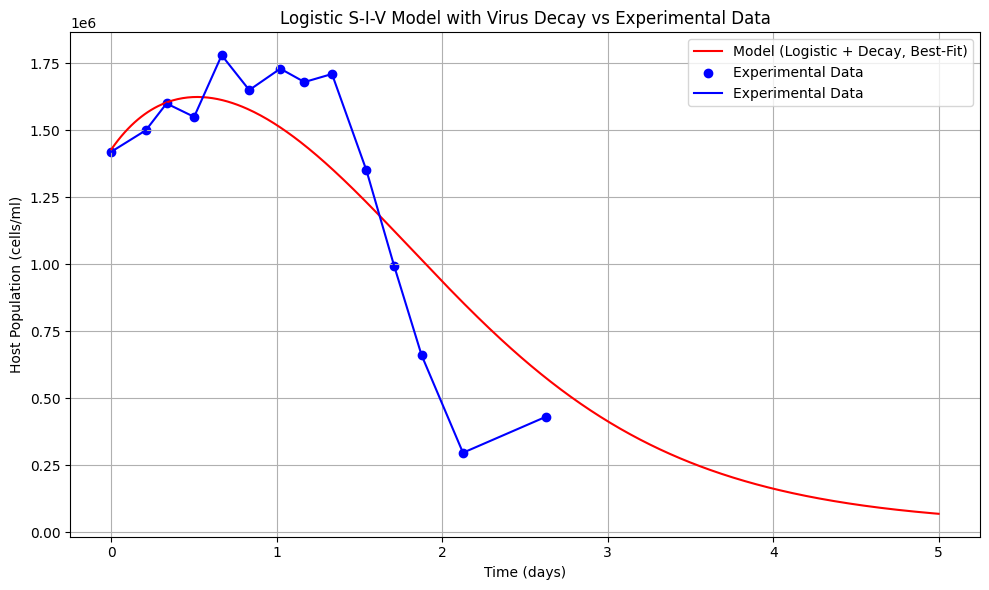

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# --- Load treatment data (virus-infected hosts) ---
treat_df = pd.read_csv("/content/phaeocystis_PgV_one_step.csv")

# --- Initial conditions ---
S0 = treat_df['host'][0]   # initial susceptible hosts (from data)
I0 = 0                     # assume no infected at t=0
V0 = 2.5e7                 # initial virus population (assumed)
tmin, tmax, delta = 0, 5, 0.01
times = np.linspace(tmin, tmax, int((tmax - tmin) / delta))

# --- Logistic + Infection + Decay model (Euler method) ---
def simulate_logistic_decay(params):
    """
    Logistic host growth with infection dynamics and virus decay.
    params = [mu, phi, lambda_, beta, K, d]

    mu      = host growth rate
    phi     = infection rate
    lambda_ = infected host lysis rate
    beta    = burst size (viruses per lysed host)
    K       = carrying capacity
    d       = virus decay rate
    """
    mu, phi, lambda_, beta, K, d = params

    # Initialize state variables
    S, I, V = S0, I0, V0
    Hs = []  # total hosts (S + I)

    # Euler integration loop
    for t in times:
        # Host dynamics with logistic growth
        dS = mu * S * (1 - (S + I)/K) - phi * S * V
        # Infected host dynamics
        dI = phi * S * V - lambda_ * I
        # Virus dynamics with decay term (-d*V)
        dV = beta * lambda_ * I - phi * S * V - d * V

        # Update populations
        S = S + dS * delta
        I = I + dI * delta
        V = V + dV * delta

        # Record total hosts
        Hs.append(S + I)

    return np.array(Hs)

# --- Error function for optimizer ---
def error_logistic_decay(params):
    Hs = simulate_logistic_decay(params)
    H_model = np.interp(treat_df['time'], times, Hs)  # align with data time points
    return np.sum((H_model - treat_df['host'])**2)     # sum of squared errors

# --- Initial guess (reasonable defaults) ---
initial_guess = [0.8, 2e-7, 0.8, 40, 2.5e6, 0.1]
# [mu, phi, lambda, beta, K, d]

# --- Bounds to keep parameters realistic ---
bounds = [
    (0.01, 2),      # mu
    (1e-8, 1e-6),   # phi
    (0.01, 2),      # lambda
    (5, 100),       # beta
    (1e6, 1e7),     # K
    (0.001, 2)      # d
]

# --- Run optimizer ---
result = minimize(error_logistic_decay, initial_guess, bounds=bounds)
best_params = result.x
print("Best-fit parameters with logistic + decay:")
print(f"mu = {best_params[0]:.4f}, phi = {best_params[1]:.2e}, "
      f"lambda = {best_params[2]:.4f}, beta = {best_params[3]:.2f}, "
      f"K = {best_params[4]:.2e}, d = {best_params[5]:.4f}")

# --- Simulate with best-fit parameters ---
Hs_best = simulate_logistic_decay(best_params)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(times, Hs_best, label='Model (Logistic + Decay, Best-Fit)', color='red')
plt.scatter(treat_df['time'], treat_df['host'], label='Experimental Data', color='blue')
plt.plot(treat_df['time'], treat_df['host'], label='Experimental Data', color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Host Population (cells/ml)')
plt.title('Logistic S-I-V Model with Virus Decay vs Experimental Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
!jupyter nbconvert --to html /content/fred_classwork2.ipynb


[NbConvertApp] WARNING | pattern '/content/fred_classwork2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
